read pickle

In [2]:
import pickle

picklefile = "/u/az6922/DRing/src/emp/datacentre/experiments/scalability/fifty_2_5.pickle"
with open(picklefile, 'rb') as file:
    datadict = pickle.load(file)

flowsize distribution

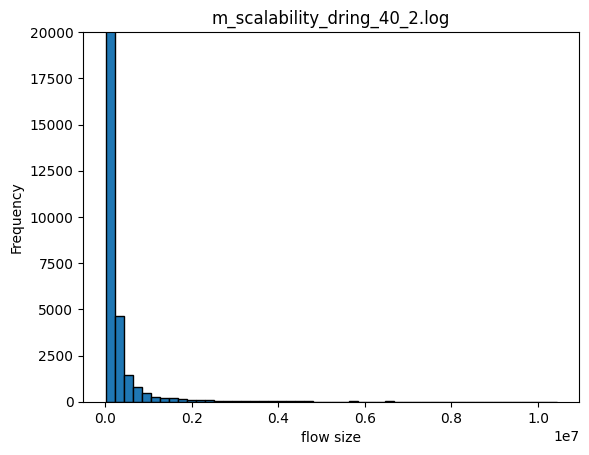

In [12]:
logfile = "m_scalability_dring_40_2.log"

flowsizelist = datadict[logfile][1]
import matplotlib.pyplot as plt

plt.hist(flowsizelist, bins=50, edgecolor='black')

plt.title(logfile)
plt.xlabel('flow size')
plt.ylabel('Frequency')
plt.ylim(0,20000)

plt.show()


In [3]:
avglist = list()
for logfile,valuelist in datadict.items():
    flowsizelist = datadict[logfile][1]
    avglist.append(sum(flowsizelist)/len(flowsizelist))
print(avglist)
print(sum(avglist)/len(avglist))

[34787.62291390031, 34463.18492454135, 34456.13674287318, 34901.512964197995, 34570.23841116462, 35033.98885717947, 34755.36458089577, 34803.00684733654, 35172.16049239525, 35238.79721965439, 35119.98871494677, 35371.09996573995, 35176.70148745902, 35075.294817055714, 35179.79291084855, 35220.496558420484, 34827.79625745559, 34860.80614554517, 34985.28200578548, 34791.64396907407, 34814.487716763004, 34844.9175822083, 34800.3200823482, 34856.76996827506, 34917.1731152211, 35047.63089993717, 34945.29923505637, 34958.481621624625, 34999.121741394054, 34962.941822776644, 35052.744239652755, 34913.21383360752, 34760.07067830815, 34857.18144096954, 34891.916712708124, 34839.39580549016, 34886.63542078258, 34852.375010142445, 34830.26557094283, 34976.329969468854]
34919.95473135367


flowsize threshold set to 35000

for short flows: look at FCT
for long flows: look at throughput

In [4]:
filename = "fifty"
threshold = 35000
homedir = "/u/az6922"
conffile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{filename}.conf"
sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{filename}2.txt"
with open(conffile,'r') as f:
    with open(sumfile,'a') as sumf:
        lines = f.readlines()
        for line in lines:
            tokens = line.split()
            logfile = tokens[32]
            sizelist = datadict[logfile][1]
            durationlist = datadict[logfile][0]
            startlist = datadict[logfile][2]

            fctlist = list()
            throughputlist = list()
            for isize,size in enumerate(sizelist):
                duration = durationlist[isize]
                start = startlist[isize]
                if size<threshold:
                    fctlist.append(duration)
                else:
                    throughputlist.append(size/duration)

            sumf.write(f"{logfile}\t{sum(fctlist)/len(fctlist)}\t{fctlist[int(len(fctlist)*0.5)]}\t{fctlist[int(len(fctlist)*0.99)]}\t{fctlist[int(len(fctlist)*0.9999)]}\t")
            sumf.write(f"{sum(throughputlist)/len(throughputlist)}\t{throughputlist[int(len(throughputlist)*0.5)]}\t{throughputlist[int(len(throughputlist)*0.99)]}\t{throughputlist[int(len(throughputlist)*0.9999)]}\n")

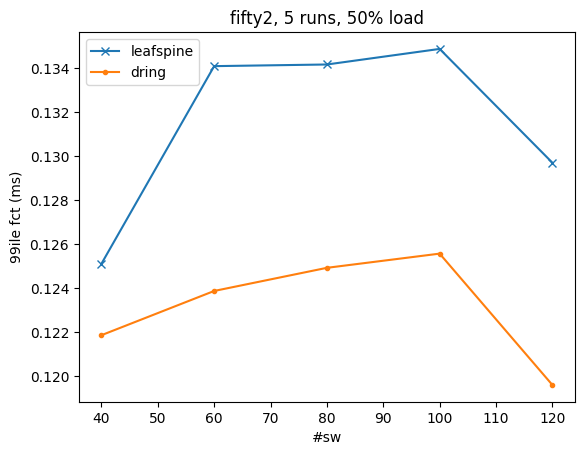

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

trafficname = "fifty2"

homedir = "/u/az6922"
sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{trafficname}.txt"
swlist = range(40,121,20)
sseedarr = range(1,6)

dringylist = list()
lsylist = list()
with open(sumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        dringseedlist = list()
        lsseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability_leafspine_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[2])
                    lsseedlist.append(n99fct)
            logfile = f"m_scalability_dring_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[2])
                    dringseedlist.append(n99fct)
        dringylist.append(sum(dringseedlist)/len(dringseedlist))
        lsylist.append(sum(lsseedlist)/len(lsseedlist))

plt.plot(swlist,lsylist,label="leafspine",marker='x')
plt.plot(swlist,dringylist,label="dring",marker='.')

plt.legend()
plt.xlabel('#sw')
plt.ylabel('99ile fct (ms)')
plt.title(f'{trafficname}, 5 runs, 50% load')
# plt.ylim(0,20)
# plt.savefig(f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{trafficname}.png", dpi=500)
plt.show()

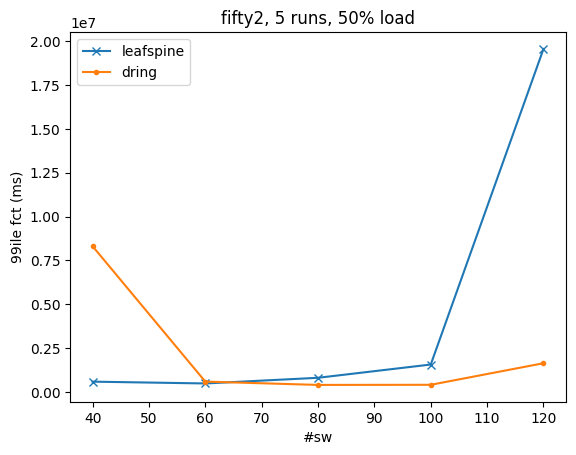

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

trafficname = "fifty2"

homedir = "/u/az6922"
sumfile = f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{trafficname}.txt"
swlist = range(40,121,20)
sseedarr = range(1,6)

dringylist = list()
lsylist = list()
with open(sumfile,'r') as f:
    lines = f.readlines()
    for sw in swlist:
        dringseedlist = list()
        lsseedlist = list()
        for sseed in sseedarr:
            logfile = f"m_scalability_leafspine_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[6]) # n99throughput instead
                    lsseedlist.append(n99fct)
            logfile = f"m_scalability_dring_{sw}_{sseed}.log"
            for line in lines:
                tokens = line.split()
                if tokens[0] == logfile:
                    n99fct = float(tokens[6])
                    dringseedlist.append(n99fct)
        dringylist.append(sum(dringseedlist)/len(dringseedlist))
        lsylist.append(sum(lsseedlist)/len(lsseedlist))

plt.plot(swlist,lsylist,label="leafspine",marker='x')
plt.plot(swlist,dringylist,label="dring",marker='.')

plt.legend()
plt.xlabel('#sw')
plt.ylabel('99ile fct (ms)')
plt.title(f'{trafficname}, 5 runs, 50% load')
# plt.ylim(0,20)
# plt.savefig(f"{homedir}/DRing/src/emp/datacentre/experiments/scalability/{trafficname}.png", dpi=500)
plt.show()

In [13]:
pctlist = list()
for i in range(5):
    ls = lsylist[i]
    dring = dringylist[i]
    pctlist.append((dring-ls)/ls)
print(pctlist)

[0.057504650984773774, 0.09953296300273351, 0.09333114757132537, 0.0917757363847053, 0.09946034078354449]


- median throughput is the only one that shows the shape we wanted
- but maybe this shows DRing is actually quite good at these scales
- I think it could be that 40 switches have a difference in numservers of 2 instead of 1. when we do all to all, this could make things unbalanced and thus DRing is not that good.